# **Model Classification**

Loading PreProcessed Data that has been labeled for **the first 300 data**

In [3]:
import pandas as pd

df = pd.read_csv('data_clean_fix_labelled.csv')

labeled_df = df[df['label'].notnull()]
unlabeled_df = df[df['label'].isnull()]

display(df)

,username,clean_text_fix,label
0,radhynkania,stres baca berita covid demam panas dingin sem...,nonhoaks
1,BobbieTrussell,berhati hatilah berita palsu pertimbangkan ber...,nonhoaks
2,Fatimah57403657,pemilihan janji janji palsu masyarakat pemboho...,hoaks
3,WahidUnyax,lawan berita palsu hoaks disinformasi tercapai...,nonhoaks
4,Kota_Tangerang,pemerintah kota pemerintahan kota tangerang di...,nonhoaks
...,...,...,...
1173,Felsel_,bang jhon bodoh pemilihan berlaku dasar hukum ...,NaN
1174,Anika_Saraswari,anjing pemilihan selesai orang terkena kabar h...,NaN
1175,TriantoHerson,sindir orde pemilihan pemenangnya presidenya s...,NaN
1176,DindaP1805,demokrasi kuat ruang digital bersih mari menja...,NaN


Separating Labeled and Unlabeled Data



*   Saving 300 labeled data to 'labeled_data.csv'



In [4]:
labeled_df.to_csv('labeled_data.csv', index=False)

print("Data yang sudah dilabeli berhasil disimpan ke 'labeled.csv'.")

Data yang sudah dilabeli berhasil disimpan ke 'labeled.csv'.




*   Saving the remaining unlabeled data



In [5]:
unlabeled_df.to_csv('unlabeled_data.csv', index=False)

print("Data yang belum dilabeli berhasil disimpan ke 'unlabeled_data.csv'.")

Data yang belum dilabeli berhasil disimpan ke 'unlabeled_data.csv'.




---


# **Naive Bayes Classification**


Training dan Testing 300 data berlabel menggunakan Naive Bayes





In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('labeled_data.csv')
X_labeled = df['clean_text_fix']
y_labeled = df['label']

vectorizer = TfidfVectorizer()
X_labeled = vectorizer.fit_transform(X_labeled)

X_train, X_test, y_train, y_test = train_test_split(
    X_labeled, y_labeled, test_size=0.2, random_state=42, stratify=y_labeled
)

# training model menggunakan metode Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7833333333333333
Classification Report:
               precision    recall  f1-score   support

       hoaks       1.00      0.28      0.43        18
    nonhoaks       0.76      1.00      0.87        42

    accuracy                           0.78        60
   macro avg       0.88      0.64      0.65        60
weighted avg       0.83      0.78      0.74        60





Handling unbalanced data menggunakan SMOTE



In [7]:
from imblearn.over_sampling import SMOTE

# Oversample dengan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# training model Naive Bayes setelah SMOTE
nb_model.fit(X_train_smote, y_train_smote)

y_pred_smote = nb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_smote))

Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

       hoaks       0.81      0.94      0.87        18
    nonhoaks       0.97      0.90      0.94        42

    accuracy                           0.92        60
   macro avg       0.89      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60



C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  war



Label Prediction untuk Data yang Belum dilabeli



In [8]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

labeled_data = pd.read_csv('labeled_data.csv')
X_train = labeled_data['clean_text_fix']
y_train = labeled_data['label']

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

unlabeled_data = pd.read_csv('unlabeled_data.csv')
X_unlabeled = unlabeled_data['clean_text_fix']
X_unlabeled_tfidf = vectorizer.transform(X_unlabeled)

# Prediksi label untuk data yang belum dilabeli
predicted_labels = model.predict(X_unlabeled_tfidf)

unlabeled_data['label'] = predicted_labels

final_dataset = pd.concat([labeled_data, unlabeled_data], ignore_index=True)

final_dataset.to_csv('final_dataset_with_labels.csv', index=False)

display(final_dataset)

,username,clean_text_fix,label
0,radhynkania,stres baca berita covid demam panas dingin sem...,nonhoaks
1,BobbieTrussell,berhati hatilah berita palsu pertimbangkan ber...,nonhoaks
2,Fatimah57403657,pemilihan janji janji palsu masyarakat pemboho...,hoaks
3,WahidUnyax,lawan berita palsu hoaks disinformasi tercapai...,nonhoaks
4,Kota_Tangerang,pemerintah kota pemerintahan kota tangerang di...,nonhoaks
...,...,...,...
1173,Felsel_,bang jhon bodoh pemilihan berlaku dasar hukum ...,hoaks
1174,Anika_Saraswari,anjing pemilihan selesai orang terkena kabar h...,nonhoaks
1175,TriantoHerson,sindir orde pemilihan pemenangnya presidenya s...,hoaks
1176,DindaP1805,demokrasi kuat ruang digital bersih mari menja...,nonhoaks


Evaluasi Model






*   Mengukur Performa Model dengan  Metrik Accuracy, Precision, Recall, dan F1-Score  



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

file = 'final_dataset_with_labels.csv'
df = pd.read_csv(file)

X = df['clean_text_fix']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy Score: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy Score: 0.85
Precision: 0.86
Recall: 0.85
F1-Score: 0.81
Classification Report:
              precision    recall  f1-score   support

       hoaks       0.91      0.22      0.36        45
    nonhoaks       0.84      0.99      0.91       191

    accuracy                           0.85       236
   macro avg       0.88      0.61      0.64       236
weighted avg       0.86      0.85      0.81       236





*  Evaluasi Model dengan n-gram (unigram, bigram, dan trigram)



In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

data = pd.read_csv('final_dataset_with_labels.csv')

X = data['clean_text_fix']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(ngram_range=(1, 3))

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Akurasi: {accuracy}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi: 0.826271186440678
Precision: 0.86
Recall: 0.83
F1-Score: 0.76

Classification Report:
              precision    recall  f1-score   support

       hoaks       1.00      0.09      0.16        45
    nonhoaks       0.82      1.00      0.90       191

    accuracy                           0.83       236
   macro avg       0.91      0.54      0.53       236
weighted avg       0.86      0.83      0.76       236





*   Confusion Matrix (Tanpa n-gram)




Accuracy Score: 0.85
Precision: 0.86
Recall: 0.85
F1-Score: 0.81
Classification Report:
              precision    recall  f1-score   support

       hoaks       0.91      0.22      0.36        45
    nonhoaks       0.84      0.99      0.91       191

    accuracy                           0.85       236
   macro avg       0.88      0.61      0.64       236
weighted avg       0.86      0.85      0.81       236



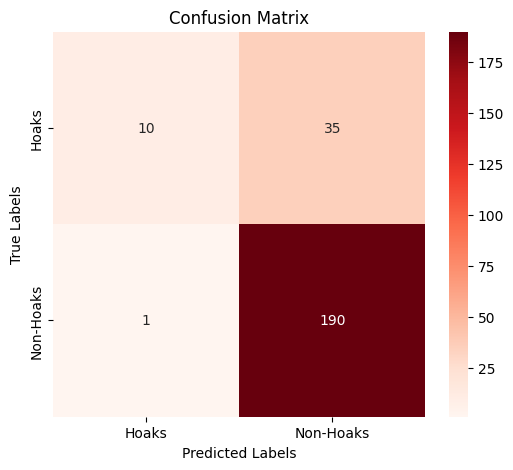

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

file = 'final_dataset_with_labels.csv'
df = pd.read_csv(file)

X = df['clean_text_fix']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy Score: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix dengan heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Hoaks', 'Non-Hoaks'], yticklabels=['Hoaks', 'Non-Hoaks'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


*   ROC-AUC (Receiver Operating Characteristic - Area Under Curve)




In [10]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Enable probability prediction
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test_tfidf)

# Calculate ROC-AUC
if len(np.unique(y)) > 2:  # Multiclass
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
else:  # Binary classification
    roc_auc = roc_auc_score(y_test, y_prob[:, 1])

print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.93


True Positives (TP): 10
False Positives (FP): 1
True Negatives (TN): 190
False Negatives (FN): 35


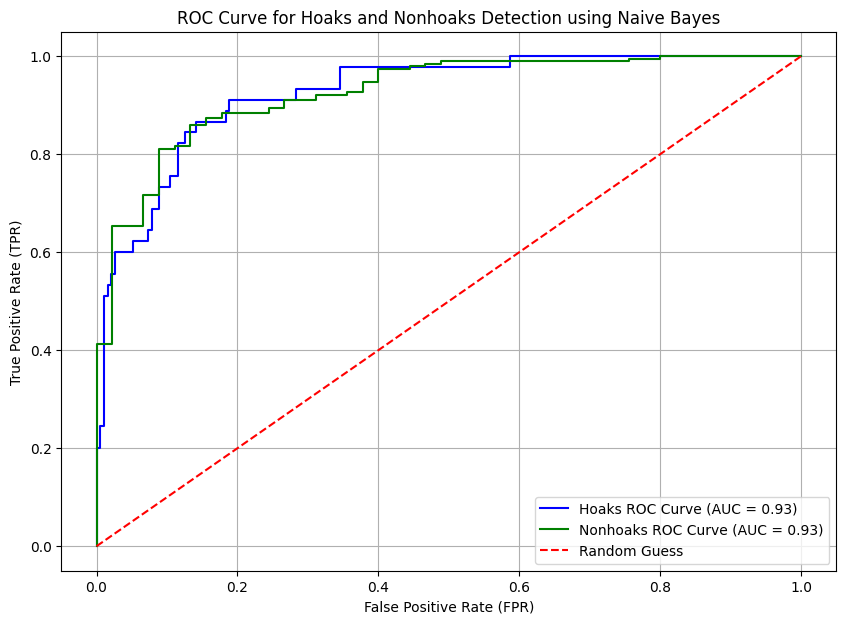

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assign TP, FP, FN, TN
tp = cm[0, 0]  # hoaks correctly predicted as hoaks
fp = cm[1, 0]  # nonhoaks wrongly predicted as hoaks
fn = cm[0, 1]  # hoaks wrongly predicted as nonhoaks
tn = cm[1, 1]  # nonhoaks correctly predicted as nonhoaks

print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

# ROC Curve for both hoaks and nonhoaks
fpr_hoaks, tpr_hoaks, _ = roc_curve(y_test, y_prob[:, 0], pos_label='hoaks')  # hoaks as positive
roc_auc_hoaks = auc(fpr_hoaks, tpr_hoaks)

fpr_nonhoaks, tpr_nonhoaks, _ = roc_curve(y_test, y_prob[:, 1], pos_label='nonhoaks')  # nonhoaks as positive
roc_auc_nonhoaks = auc(fpr_nonhoaks, tpr_nonhoaks)

plt.figure(figsize=(10, 7))
plt.plot(fpr_hoaks, tpr_hoaks, color='blue', label=f'Hoaks ROC Curve (AUC = {roc_auc_hoaks:.2f})')
plt.plot(fpr_nonhoaks, tpr_nonhoaks, color='green', label=f'Nonhoaks ROC Curve (AUC = {roc_auc_nonhoaks:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Hoaks and Nonhoaks Detection using Naive Bayes')
plt.legend(loc='lower right')
plt.grid()
plt.show()



Menyimpan Model yang sudah dilatih



In [12]:
import joblib

joblib.dump(nb_model, 'naive_bayes_model.pkl')

print("Models have been saved!")

Models have been saved!




---
# **Support Vector Machine (SVM) Classification**


Training dan Testing 300 data berlabel menggunakan SVM



*   Menggunakan Kernel **Linear**



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X_labeled, y_labeled, test_size=0.2, random_state=42, stratify=y_labeled
)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

       hoaks       0.89      0.89      0.89        18
    nonhoaks       0.95      0.95      0.95        42

    accuracy                           0.93        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.93      0.93      0.93        60





*   Menggunakan kernel **rbf**



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X_labeled, y_labeled, test_size=0.2, random_state=42, stratify=y_labeled
)

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

       hoaks       1.00      0.72      0.84        18
    nonhoaks       0.89      1.00      0.94        42

    accuracy                           0.92        60
   macro avg       0.95      0.86      0.89        60
weighted avg       0.93      0.92      0.91        60



Label Prediction untuk Data yang Belum dilabeli

1. Menggunakan Kernel **rbf**

In [16]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

labeled_data = pd.read_csv('labeled_data.csv')
X_train = labeled_data['clean_text_fix']
y_train = labeled_data['label']

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

model = SVC(C=10, gamma=0.1, kernel='rbf')
model.fit(X_train_tfidf, y_train)

unlabeled_data = pd.read_csv('unlabeled_data.csv')
X_unlabeled = unlabeled_data['clean_text_fix']
X_unlabeled_tfidf = vectorizer.transform(X_unlabeled)

predicted_labels = model.predict(X_unlabeled_tfidf)

unlabeled_data['label'] = predicted_labels

final_dataset = pd.concat([labeled_data, unlabeled_data], ignore_index=True)

final_dataset.to_csv('final_dataset_with_labels_using_svm.csv', index=False)

display(final_dataset)

,username,clean_text_fix,label
0,radhynkania,stres baca berita covid demam panas dingin sem...,nonhoaks
1,BobbieTrussell,berhati hatilah berita palsu pertimbangkan ber...,nonhoaks
2,Fatimah57403657,pemilihan janji janji palsu masyarakat pemboho...,hoaks
3,WahidUnyax,lawan berita palsu hoaks disinformasi tercapai...,nonhoaks
4,Kota_Tangerang,pemerintah kota pemerintahan kota tangerang di...,nonhoaks
...,...,...,...
1173,Felsel_,bang jhon bodoh pemilihan berlaku dasar hukum ...,hoaks
1174,Anika_Saraswari,anjing pemilihan selesai orang terkena kabar h...,hoaks
1175,TriantoHerson,sindir orde pemilihan pemenangnya presidenya s...,hoaks
1176,DindaP1805,demokrasi kuat ruang digital bersih mari menja...,nonhoaks





Evaluasi Model





*   Mengukur Performa Model dengan  Metrik Accuracy, Precision, Recall, dan F1-Score




In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

data = 'final_dataset_with_labels_using_svm.csv'
df = pd.read_csv(data)

X = df['clean_text_fix']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = SVC(C=10, gamma=0.1, kernel='rbf')
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy Score: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy Score: 0.91
Precision: 0.91
Recall: 0.91
F1-Score: 0.91
Classification Report:
              precision    recall  f1-score   support

       hoaks       0.88      0.91      0.90       101
    nonhoaks       0.93      0.91      0.92       135

    accuracy                           0.91       236
   macro avg       0.91      0.91      0.91       236
weighted avg       0.91      0.91      0.91       236





*   Confusion Matrix



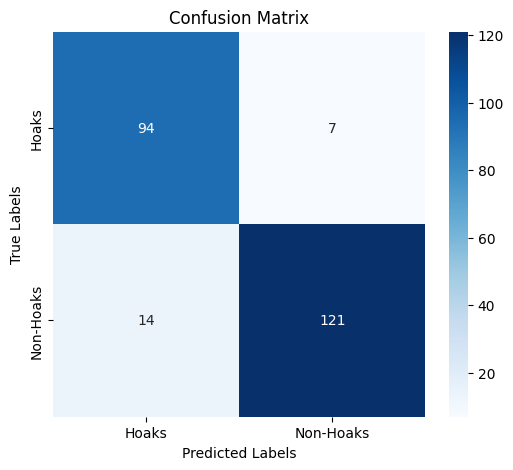

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Hoaks', 'Non-Hoaks'], yticklabels=['Hoaks', 'Non-Hoaks'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



*   ROC-AUC (Receiver Operating Characteristic - Area Under Curve)



In [19]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Enable probability prediction
model = SVC(C=10, gamma=0.1, kernel='rbf', probability=True)
model.fit(X_train_tfidf, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test_tfidf)

# Calculate ROC-AUC
if len(np.unique(y)) > 2:  # Multiclass
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
else:  # Binary classification
    roc_auc = roc_auc_score(y_test, y_prob[:, 1])

print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.98


True Positives (TP): 94
False Positives (FP): 14
True Negatives (TN): 121
False Negatives (FN): 7


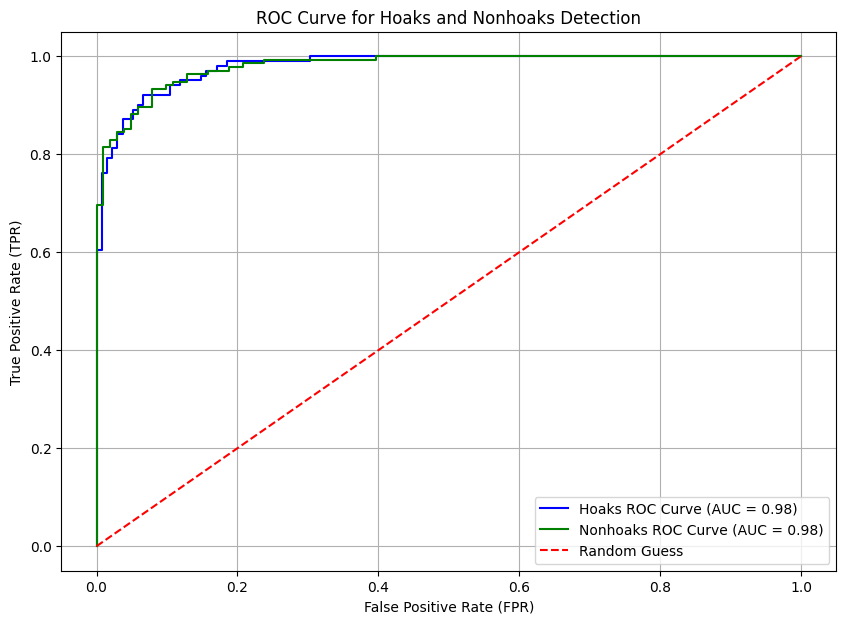

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assign TP, FP, FN, TN
tp = cm[0, 0]  # hoaks correctly predicted as hoaks
fp = cm[1, 0]  # nonhoaks wrongly predicted as hoaks
fn = cm[0, 1]  # hoaks wrongly predicted as nonhoaks
tn = cm[1, 1]  # nonhoaks correctly predicted as nonhoaks

print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

# ROC Curve for both hoaks and nonhoaks
fpr_hoaks, tpr_hoaks, _ = roc_curve(y_test, y_prob[:, 0], pos_label='hoaks')  # hoaks as positive
roc_auc_hoaks = auc(fpr_hoaks, tpr_hoaks)

fpr_nonhoaks, tpr_nonhoaks, _ = roc_curve(y_test, y_prob[:, 1], pos_label='nonhoaks')  # nonhoaks as positive
roc_auc_nonhoaks = auc(fpr_nonhoaks, tpr_nonhoaks)

plt.figure(figsize=(10, 7))
plt.plot(fpr_hoaks, tpr_hoaks, color='blue', label=f'Hoaks ROC Curve (AUC = {roc_auc_hoaks:.2f})')
plt.plot(fpr_nonhoaks, tpr_nonhoaks, color='green', label=f'Nonhoaks ROC Curve (AUC = {roc_auc_nonhoaks:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Hoaks and Nonhoaks Detection')
plt.legend(loc='lower right')
plt.grid()
plt.show()

2. Menggunakan Kernel **Linear**

In [21]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

labeled_data = pd.read_csv('labeled_data.csv')
X_train = labeled_data['clean_text_fix']
y_train = labeled_data['label']

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

model = SVC(C=10, gamma=0.1, kernel='linear')
model.fit(X_train_tfidf, y_train)

unlabeled_data = pd.read_csv('unlabeled_data.csv')
X_unlabeled = unlabeled_data['clean_text_fix']
X_unlabeled_tfidf = vectorizer.transform(X_unlabeled)

predicted_labels = model.predict(X_unlabeled_tfidf)

unlabeled_data['label'] = predicted_labels

final_dataset = pd.concat([labeled_data, unlabeled_data], ignore_index=True)

final_dataset.to_csv('final_dataset_with_labels_using_svm.csv', index=False)

display(final_dataset)

,username,clean_text_fix,label
0,radhynkania,stres baca berita covid demam panas dingin sem...,nonhoaks
1,BobbieTrussell,berhati hatilah berita palsu pertimbangkan ber...,nonhoaks
2,Fatimah57403657,pemilihan janji janji palsu masyarakat pemboho...,hoaks
3,WahidUnyax,lawan berita palsu hoaks disinformasi tercapai...,nonhoaks
4,Kota_Tangerang,pemerintah kota pemerintahan kota tangerang di...,nonhoaks
...,...,...,...
1173,Felsel_,bang jhon bodoh pemilihan berlaku dasar hukum ...,hoaks
1174,Anika_Saraswari,anjing pemilihan selesai orang terkena kabar h...,hoaks
1175,TriantoHerson,sindir orde pemilihan pemenangnya presidenya s...,hoaks
1176,DindaP1805,demokrasi kuat ruang digital bersih mari menja...,nonhoaks


Evaluasi Model



*   Mengukur Performa Model dengan  Metrik Accuracy, Precision, Recall, dan F1-Score



In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

data = 'final_dataset_with_labels_using_svm.csv'
df = pd.read_csv(data)

X = df['clean_text_fix']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = SVC(C=10, gamma=0.01, kernel='linear')
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy Score: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy Score: 0.91
Precision: 0.91
Recall: 0.91
F1-Score: 0.91
Classification Report:
              precision    recall  f1-score   support

       hoaks       0.88      0.90      0.89       101
    nonhoaks       0.92      0.91      0.92       135

    accuracy                           0.91       236
   macro avg       0.90      0.91      0.91       236
weighted avg       0.91      0.91      0.91       236





*   Confusion Matrix



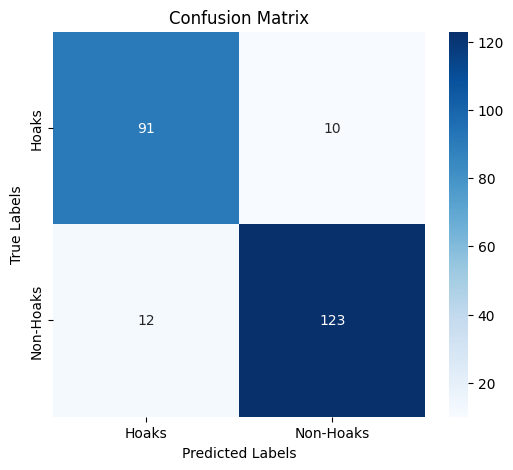

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Hoaks', 'Non-Hoaks'], yticklabels=['Hoaks', 'Non-Hoaks'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



*   ROC-AUC (Receiver Operating Characteristic - Area Under Curve)




In [24]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Enable probability prediction
model = SVC(C=10, gamma=0.01, kernel='linear', probability=True)
model.fit(X_train_tfidf, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test_tfidf)

# Calculate ROC-AUC
if len(np.unique(y)) > 2:  # Multiclass
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
else:  # Binary classification
    roc_auc = roc_auc_score(y_test, y_prob[:, 1])

print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.98


True Positives (TP): 91
False Positives (FP): 12
True Negatives (TN): 123
False Negatives (FN): 10


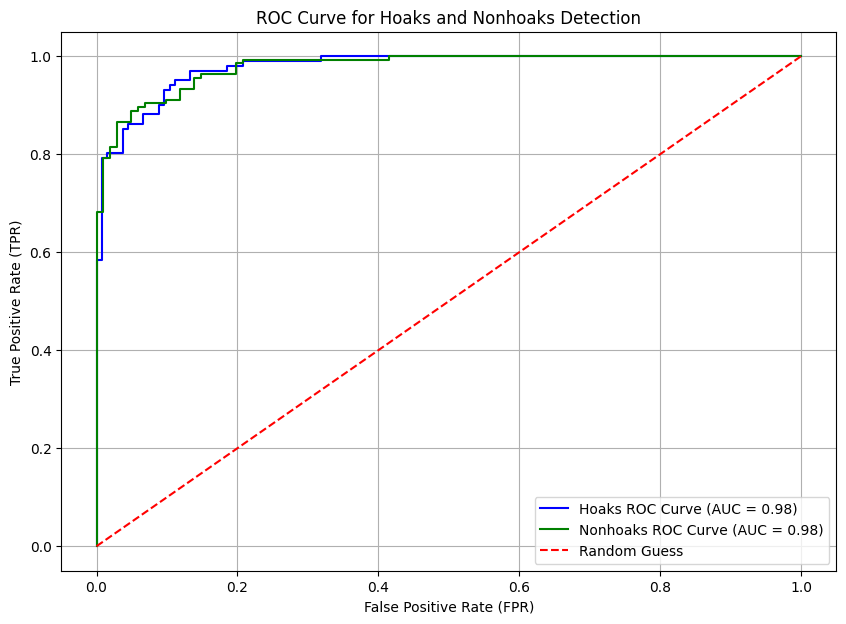

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assign TP, FP, FN, TN
tp = cm[0, 0]  # hoaks correctly predicted as hoaks
fp = cm[1, 0]  # nonhoaks wrongly predicted as hoaks
fn = cm[0, 1]  # hoaks wrongly predicted as nonhoaks
tn = cm[1, 1]  # nonhoaks correctly predicted as nonhoaks

print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

# ROC Curve for both hoaks and nonhoaks
fpr_hoaks, tpr_hoaks, _ = roc_curve(y_test, y_prob[:, 0], pos_label='hoaks')  # hoaks as positive
roc_auc_hoaks = auc(fpr_hoaks, tpr_hoaks)

fpr_nonhoaks, tpr_nonhoaks, _ = roc_curve(y_test, y_prob[:, 1], pos_label='nonhoaks')  # nonhoaks as positive
roc_auc_nonhoaks = auc(fpr_nonhoaks, tpr_nonhoaks)

plt.figure(figsize=(10, 7))
plt.plot(fpr_hoaks, tpr_hoaks, color='blue', label=f'Hoaks ROC Curve (AUC = {roc_auc_hoaks:.2f})')
plt.plot(fpr_nonhoaks, tpr_nonhoaks, color='green', label=f'Nonhoaks ROC Curve (AUC = {roc_auc_nonhoaks:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Hoaks and Nonhoaks Detection')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Menyimpan model yang sudah dilatih

In [41]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

vectorizer = TfidfVectorizer(max_features=1257, use_idf=True, smooth_idf=True)
X_train_vectorized = vectorizer.fit_transform(X_train)

model = SVC()
model.fit(X_train_vectorized, y_train)

# Simpan model dan vectorizer
joblib.dump(model, 'svm_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("Models have been saved!")

Models have been saved!


Tuning Parameter Using Grid Search

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Pastikan X_train dan X_test adalah teks mentah
X_train = X_train.astype(str)
X_test = X_test.astype(str)

# Transformasi menggunakan TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

svm_model = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf','linear']
}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', error_score='raise')
grid_search.fit(X_train_vectorized, y_train_encoded)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Best Score: 0.9256838905775077




---
# **Insight Final Dataset**


Loading Final Dataset

In [28]:
import pandas as pd

df = pd.read_csv('final_dataset_with_labels_using_svm.csv')

display(df)

,username,clean_text_fix,label
0,radhynkania,stres baca berita covid demam panas dingin sem...,nonhoaks
1,BobbieTrussell,berhati hatilah berita palsu pertimbangkan ber...,nonhoaks
2,Fatimah57403657,pemilihan janji janji palsu masyarakat pemboho...,hoaks
3,WahidUnyax,lawan berita palsu hoaks disinformasi tercapai...,nonhoaks
4,Kota_Tangerang,pemerintah kota pemerintahan kota tangerang di...,nonhoaks
...,...,...,...
1173,Felsel_,bang jhon bodoh pemilihan berlaku dasar hukum ...,hoaks
1174,Anika_Saraswari,anjing pemilihan selesai orang terkena kabar h...,hoaks
1175,TriantoHerson,sindir orde pemilihan pemenangnya presidenya s...,hoaks
1176,DindaP1805,demokrasi kuat ruang digital bersih mari menja...,nonhoaks


Visualisasi Pie Chart Distribusi Kelas Hoaks dan NonHoaks

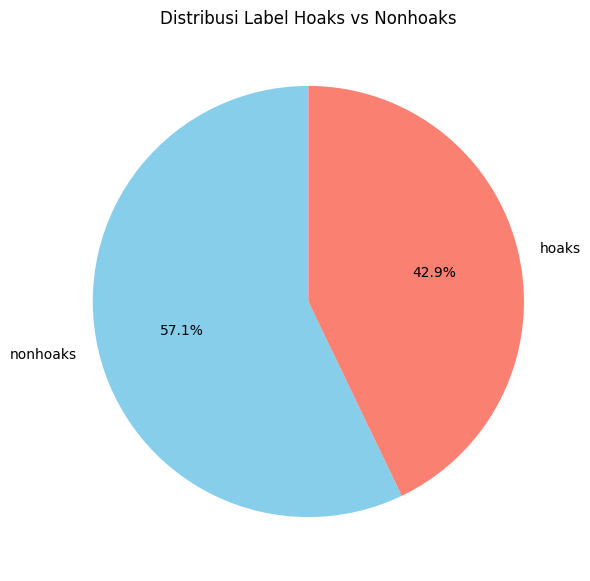

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('final_dataset_with_labels_using_svm.csv')

label_counts = df['label'].value_counts()

plt.figure(figsize=(7, 7))
label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribusi Label Hoaks vs Nonhoaks')
plt.ylabel('')
plt.show()


Visualisasi Stacked Histogram Distribusi Panjang Teks

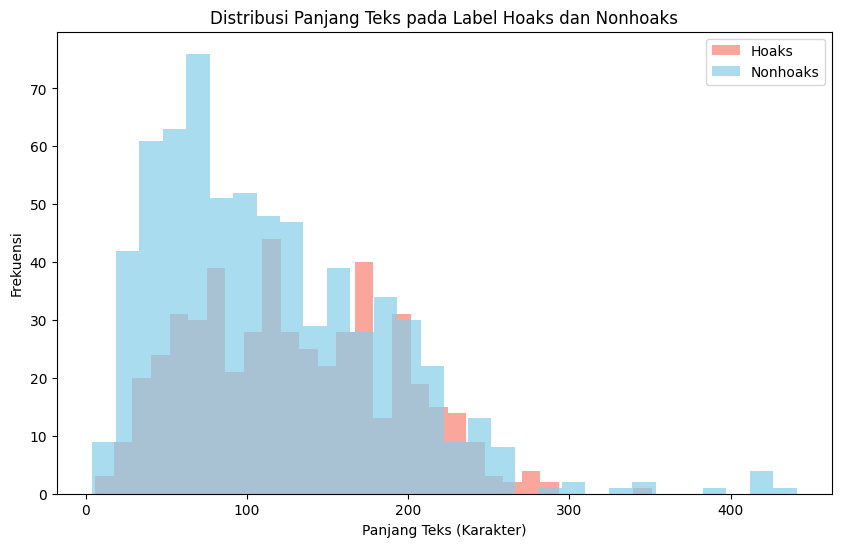

In [30]:
df['text_length'] = df['clean_text_fix'].apply(lambda x: len(str(x)))

plt.figure(figsize=(10, 6))
df[df['label'] == 'hoaks']['text_length'].plot(kind='hist', bins=30, alpha=0.7, label='Hoaks', color='salmon')
df[df['label'] == 'nonhoaks']['text_length'].plot(kind='hist', bins=30, alpha=0.7, label='Nonhoaks', color='skyblue')

plt.title('Distribusi Panjang Teks pada Label Hoaks dan Nonhoaks')
plt.xlabel('Panjang Teks (Karakter)')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

Insight Perkelas



1.   Kelas Hoaks



In [31]:
df_hoaks = df[df['label'] == 'hoaks']

display(df_hoaks)

,username,clean_text_fix,label,text_length
2,Fatimah57403657,pemilihan janji janji palsu masyarakat pemboho...,hoaks,70
17,cre4tor,lelah pemilihan dipakai era penjajahan zaman b...,hoaks,125
31,wotasepur,hoaks grup whatsapp keluarga jelang pemilihan ...,hoaks,81
36,annisawidi,sumpah lelah banget memantau lini berita klari...,hoaks,213
42,the1flash474996,setuju disuruh mengeluarkan hasil survei mingg...,hoaks,196
...,...,...,...,...
1170,_0xecure,akunnya pemilihan blok mual lihat twitnya laki...,hoaks,69
1172,vincentyonathan,tolong ditangkap menyebar hoaks menghina presi...,hoaks,117
1173,Felsel_,bang jhon bodoh pemilihan berlaku dasar hukum ...,hoaks,143
1174,Anika_Saraswari,anjing pemilihan selesai orang terkena kabar h...,hoaks,50


WordCloud Kelas Hoaks

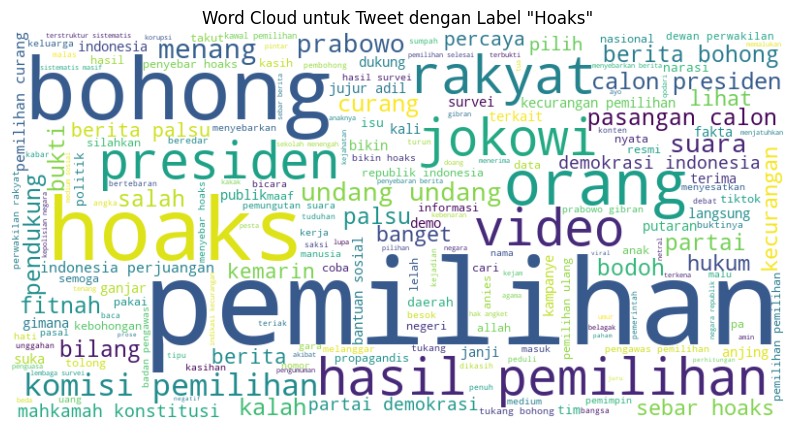

In [32]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_hoaks = ' '.join(df_hoaks['clean_text_fix'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_hoaks)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Tweet dengan Label "Hoaks"')
plt.show()

Top 10 Words Kelas Hoaks

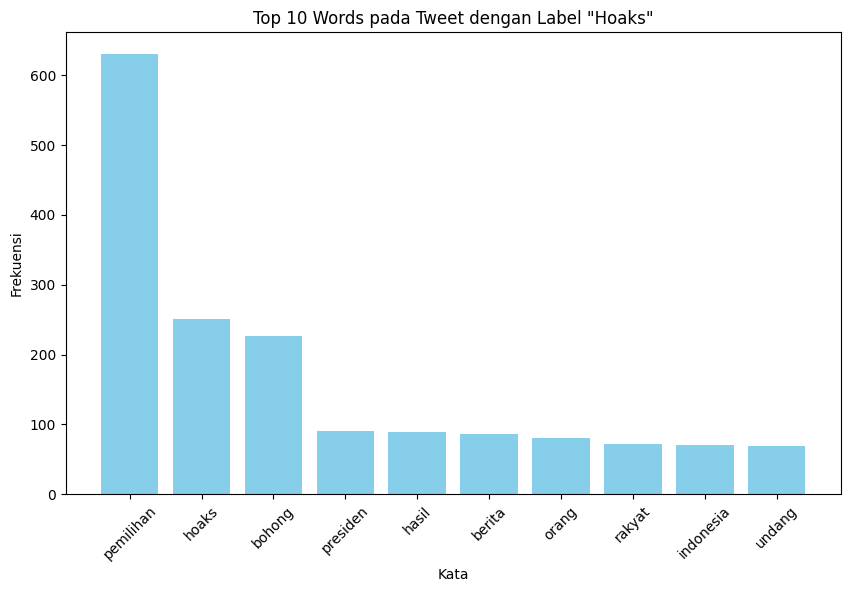

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

df_hoaks = df[df['label'] == 'hoaks']

text_hoaks = ' '.join(df_hoaks['clean_text_fix'].dropna())

tokens = re.findall(r'\b\w+\b', text_hoaks.lower())

word_counts = Counter(tokens)

top_10_words = word_counts.most_common(10)

words, counts = zip(*top_10_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Words pada Tweet dengan Label "Hoaks"')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

2. Kelas NonHoaks

In [34]:
df_nonhoaks = df[df['label'] == 'nonhoaks']

display(df_nonhoaks)

,username,clean_text_fix,label,text_length
0,radhynkania,stres baca berita covid demam panas dingin sem...,nonhoaks,123
1,BobbieTrussell,berhati hatilah berita palsu pertimbangkan ber...,nonhoaks,137
3,WahidUnyax,lawan berita palsu hoaks disinformasi tercapai...,nonhoaks,70
4,Kota_Tangerang,pemerintah kota pemerintahan kota tangerang di...,nonhoaks,219
5,s3mut1reng,dimanfaatkan kelompok radikal menyebarkan hoak...,nonhoaks,251
...,...,...,...,...
1163,Jalurlangitygy,yuk mari bersatu jadikan pemilihan momen nilai...,nonhoaks,105
1165,annix_14,pemilihan anti hoaks,nonhoaks,20
1171,wdtu,petani bersyukur harga beras mahal diuntungkan...,nonhoaks,166
1176,DindaP1805,demokrasi kuat ruang digital bersih mari menja...,nonhoaks,67


WordCloud Kelas NonHoaks

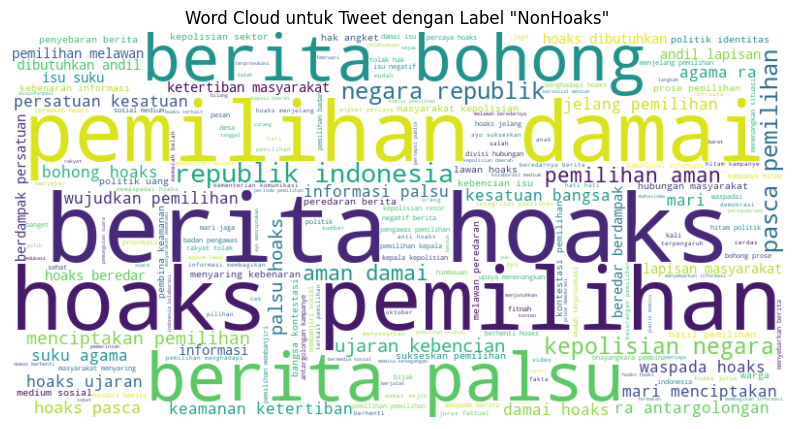

In [35]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_nonhoaks = ' '.join(df_nonhoaks['clean_text_fix'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_nonhoaks)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Tweet dengan Label "NonHoaks"')
plt.show()

Top 10 Words Kelas NonHoaks

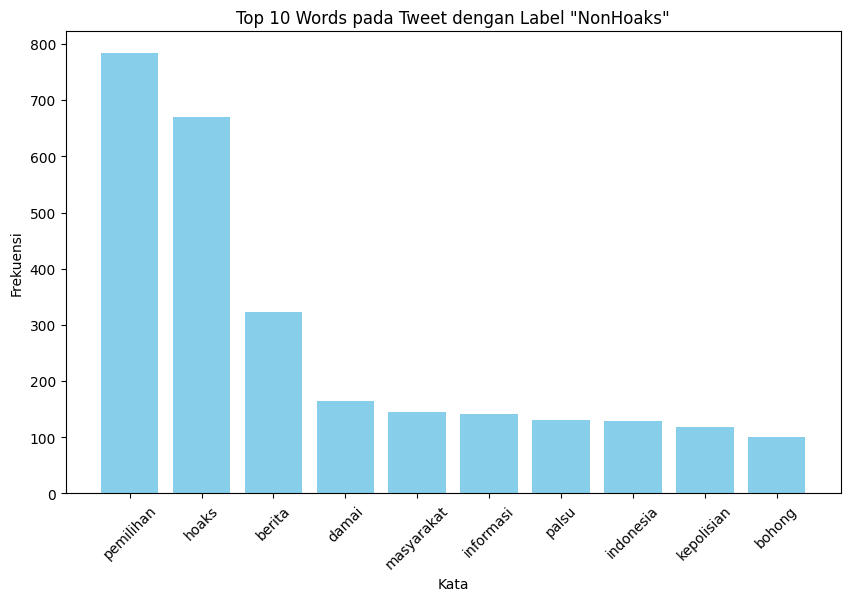

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

df_nonhoaks = df[df['label'] == 'nonhoaks']

text_nonhoaks = ' '.join(df_nonhoaks['clean_text_fix'].dropna())

tokens = re.findall(r'\b\w+\b', text_nonhoaks.lower())

word_counts = Counter(tokens)

top_10_words = word_counts.most_common(10)

words, counts = zip(*top_10_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Words pada Tweet dengan Label "NonHoaks"')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()